<a href="https://colab.research.google.com/github/hanlululu/02807-Computational-tools-for-Data-Science/blob/main/Week9/slides_week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 02807 - Computational Tools for Data Science - Week 9

# Today

* Brief introduction to database types and interfacing with them using Structured Query Language (SQL)
* A few handfuls of SQL keywords and their semantics.
* Using pandasql to execute SQL queries up against pandas dataframes
* Presentation of Project 2

# Databases and Structured Query Language (SQL)

* SQL is one of the most in-demand languages for data science and analytics. It's the programming language used with databases.
* SQL allows for accessing (reading) and manipulating (inserting, deleting, updating) relational databases.
    * All relational databases can be used to manage transaction-oriented applications (OLTP): Typically supporting the operations of some application. OLTP databases can be thought of as "Operational" databases, with frequent updates of small portions of data.

* When emphasis is on longer running queries operating over large portions of the data, non relational databases (NoSQL databases) are typically employed. This is known as Online Analytical Processing (OLAP).
    * Such databases differ in how data is structured to improve performance for such analytical queries, as well as enabling "horizontal" scaling (distributed across a number of computers).
    * Still, these NoSQL databases often support a subset of SQL queries or enable SQL-like data access.
* We'll focus on writing SQL queries that retrieve (processed) data, without looking at scalability aspects. 

## Familiarity of relational databases
* On the face of it, a relational database is a collection of tables.
* Table (similar to a pandas dataframe): 
  * collection of **rows** (also called *tuples* or *records*).
  * and **columns** (also called *fields* or *attributes*).

![SQL_terms](https://www.c-sharpcorner.com/article/sql-server-and-relational-database-part-one/Images/relational%20theory.PNG)


## Using `pandasql`

* We'll work with `pandasql` where SQL queries are executed up against a pandas dataframe. To this end, pandas dataframes in memory are automatically detected by `pandasql`. 
    * Specifically we'll use `pandasql.sqldf` to query loaded dataframes with our SQL statements. 
* The particular dialect is `SQLite`, which is relevant to know when looking up documentation.
* In short, our queries will be similar to any regular SQL table query (where the SQL server is running on some host machine), but executed up against our pandas dataframe.
    * With our prerequisites so far, this gives nearly no overhead in getting started with SQL.

In [1]:
!pip install pandasql==0.7.3
import pandas as pd
import pandasql as psql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26816 sha256=639ba0b96ad6a69efdedfe834eb6406d24fc94864c4c64c0c7d0907c815f4fe1
  Stored in directory: c:\users\hanlu\appdata\local\pip\cache\wheels\5c\4b\ec\41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


You should consider upgrading via the 'c:\users\hanlu\anaconda3\python.exe -m pip install --upgrade pip' command.


# Hotel dataset

Week 3 flashback
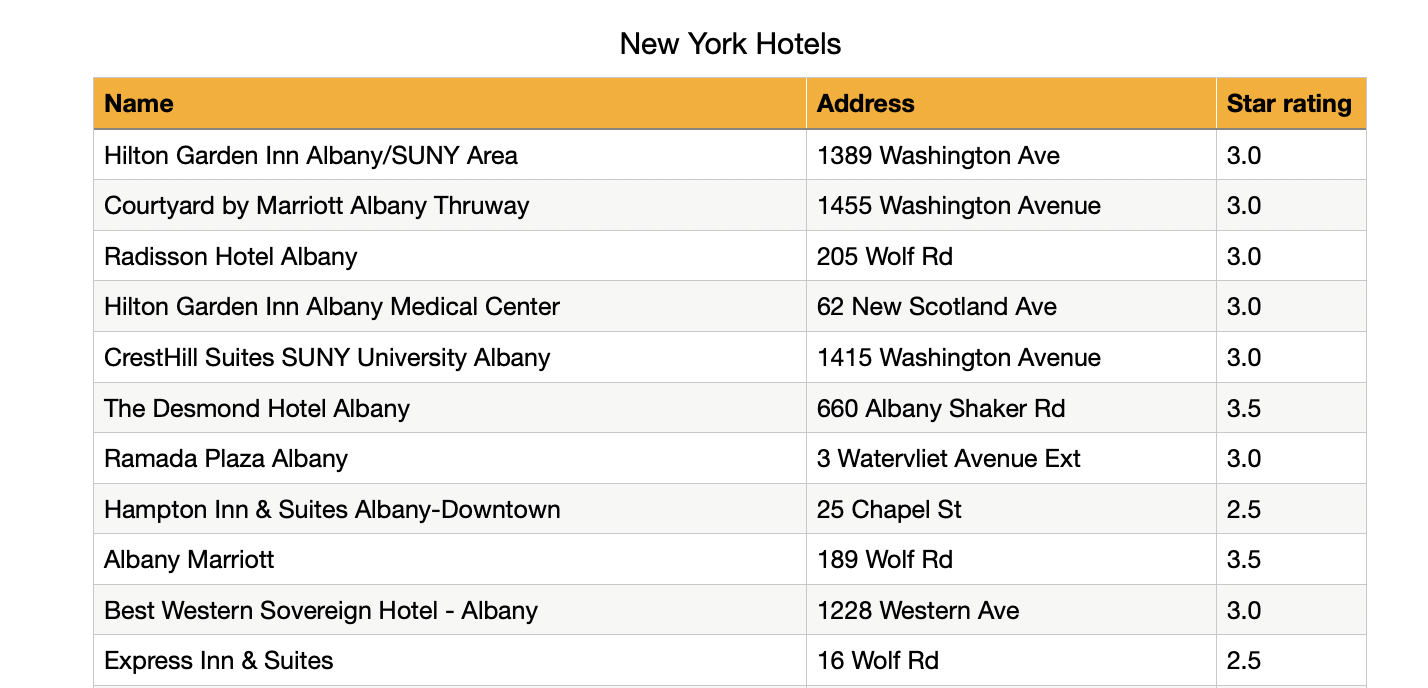

In [2]:
url = 'https://raw.githubusercontent.com/s-heisler/pycon2017-optimizing-pandas/master/pyCon%20materials/new_york_hotels.csv'
df_hotels = pd.read_csv(url, encoding='cp1252')
df_hotels.dtypes

ean_hotel_id        int64
name               object
address1           object
city               object
state_province     object
postal_code        object
latitude          float64
longitude         float64
star_rating       float64
high_rate         float64
low_rate          float64
dtype: object

In [3]:
df_hotels.head(5)

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900


# Syntax of SQLite statements for fetching data

We'll cover most of this [syntax diagram](https://www.sqlite.org/syntaxdiagrams.html#select-stmt) (excluding the red area), which also reveals the structure (i.e. top to bottom order) we need to adhere to when writing queries.

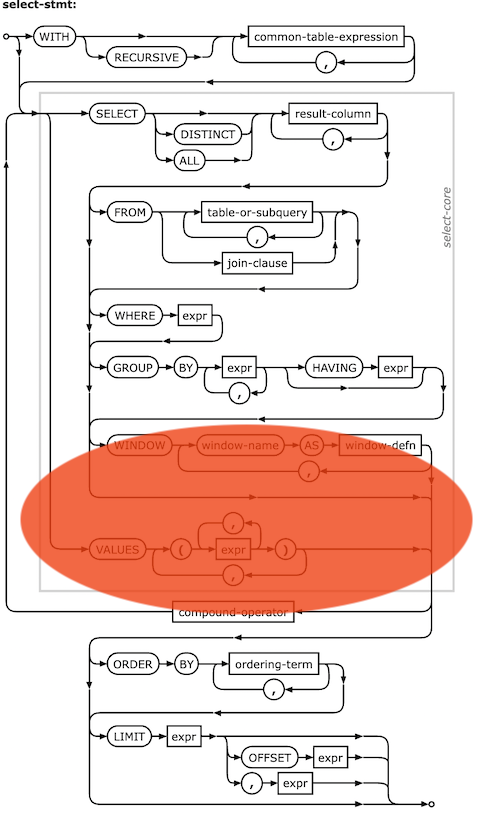

# Select, From, Where(, As)

In [4]:
# Not too useful, but valid syntax
psql.sqldf('SELECT "a", "b"')

,"""a""","""b"""
0,a,b


In [5]:
# * is wildcard: all columns returned
# sqldf returns a pandas dataframe
psql.sqldf('SELECT * FROM df_hotels')

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900
...,...,...,...,...,...,...,...,...,...,...,...
1626,324259,Residence Inn Yonkers Westchester County,7 Executive Blvd,Yonkers,NY,10701,40.97275,-73.88075,3.0,269.3600,169.3600
1627,107949,Ramada Inn Yonkers,125 Tuckahoe Rd,Yonkers,NY,10710,40.95466,-73.86483,2.5,129.0000,119.0000
1628,509723,Hyatt Place New York/Yonkers,7000 Mall Walk,Yonkers,NY,10704,40.92625,-73.85438,3.0,249.3100,199.3100
1629,621870,Hampton Inn & Suites Yonkers - Westchester,555 Tuckahoe Rd,Yonkers,NY,10710,40.95375,-73.84935,2.5,189.1900,134.1800


In [6]:
# select specific columns
psql.sqldf(""" 
SELECT name, 
       city
  FROM df_hotels
""")

,name,city
0,Hilton Garden Inn Albany/SUNY Area,Albany
1,Courtyard by Marriott Albany Thruway,Albany
2,Radisson Hotel Albany,Albany
3,Hilton Garden Inn Albany Medical Center,Albany
4,CrestHill Suites SUNY University Albany,Albany
...,...,...
1626,Residence Inn Yonkers Westchester County,Yonkers
1627,Ramada Inn Yonkers,Yonkers
1628,Hyatt Place New York/Yonkers,Yonkers
1629,Hampton Inn & Suites Yonkers - Westchester,Yonkers


In [ ]:
# Using WHERE to condition which rows are included
psql.sqldf("""
SELECT name, 
       city 
  FROM df_hotels
 WHERE city='Albany'
""")

,name,city
0,Hilton Garden Inn Albany/SUNY Area,Albany
1,Courtyard by Marriott Albany Thruway,Albany
2,Radisson Hotel Albany,Albany
3,Hilton Garden Inn Albany Medical Center,Albany
4,CrestHill Suites SUNY University Albany,Albany
5,The Desmond Hotel Albany,Albany
6,Ramada Plaza Albany,Albany
7,Hampton Inn & Suites Albany-Downtown,Albany
8,Albany Marriott,Albany
9,Best Western Sovereign Hotel - Albany,Albany


## Selecting more complex expressions, aliasing (As)

[Docs](https://www.sqlite.org/lang_expr.html) (not the easiest to parse)

In [ ]:
# We can select more than just columns
# as well as alias them (rename) using AS
# here concatenation and conditional values
psql.sqldf("""
SELECT name AS 'hotel name', 
       city || ' (' || postal_code || ')' AS concat_op,
       CASE
           WHEN postal_code = '90210' THEN 'BEVERLY HILLS!'
           ELSE 'not beverly hills'
        END casing_op
  FROM df_hotels
""")

,hotel name,concat_op,casing_op
0,Hilton Garden Inn Albany/SUNY Area,Albany (12206),not beverly hills
1,Courtyard by Marriott Albany Thruway,Albany (12206),not beverly hills
2,Radisson Hotel Albany,Albany (12205),not beverly hills
3,Hilton Garden Inn Albany Medical Center,Albany (12208),not beverly hills
4,CrestHill Suites SUNY University Albany,Albany (12206),not beverly hills
...,...,...,...
1626,Residence Inn Yonkers Westchester County,Yonkers (10701),not beverly hills
1627,Ramada Inn Yonkers,Yonkers (10710),not beverly hills
1628,Hyatt Place New York/Yonkers,Yonkers (10704),not beverly hills
1629,Hampton Inn & Suites Yonkers - Westchester,Yonkers (10710),not beverly hills


In [ ]:
# Using AVG implies an aggregation over values
psql.sqldf(""" 
SELECT AVG(low_rate)
  FROM df_hotels
 WHERE city = 'Brooklyn'
""")

,AVG(low_rate)
0,173.018582


## Compound boolean expressions

In [ ]:
# We can build compound boolean expressions 
psql.sqldf(""" 
SELECT name, 
       city,
       postal_code,
       star_rating
  FROM df_hotels
 WHERE city = 'Albany' 
   AND (postal_code = 12206 OR postal_code = 12211) 
   AND star_rating > 2.5
""")

,name,city,postal_code,star_rating
0,Hilton Garden Inn Albany/SUNY Area,Albany,12206,3.0
1,Courtyard by Marriott Albany Thruway,Albany,12206,3.0
2,CrestHill Suites SUNY University Albany,Albany,12206,3.0
3,The Desmond Hotel Albany,Albany,12211,3.5
4,Ramada Plaza Albany,Albany,12206,3.0


# Limit, Order by

In [ ]:
psql.sqldf("""
SELECT * 
  FROM df_hotels 
 LIMIT 5
""")

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900


In [ ]:
# Getting top 5 hotels by high_rate
psql.sqldf("""
  SELECT * 
    FROM df_hotels 
ORDER BY high_rate DESC
   LIMIT 5
""")

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,532245,Safehouse Suites Manhattan,1600 Broadway,New York,NY,10019,40.76037,-73.98467,5.0,10888.5000,5990.250
1,183435,The Towers of the Waldorf Astoria New York,100 E 50th St,New York,NY,10022,40.75691,-73.97335,5.0,10000.0000,1099.000
2,383834,Dream Downtown,355 W 16th St,New York,NY,10011,40.74195,-74.00369,4.5,5000.3501,299.360
3,129023,"The Carlyle, A Rosewood Hotel",35 E 76th St,New York,NY,10021,40.77461,-73.96338,5.0,4100.0400,730.030
4,131734,Four Seasons Hotel New York,57 E 57th Street,New York,NY,10022,40.76197,-73.97158,5.0,4061.2090,4060.209


In [ ]:
# Statements have to come in the correct order (cf. syntax diagram)
psql.sqldf("""
  SELECT * 
    FROM df_hotels 
   WHERE star_rating < 3.5
ORDER BY high_rate DESC
   LIMIT 5
""")

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,528548,Cesar Suites at New York South,381 S 3rd St,Brooklyn,NY,11211,40.70878,-73.95231,3.0,1199.0000,359.1000
1,400295,Fairway Suites at Peek'n Peak,1433 Conway Road,Clymer,NY,14724,42.06232,-79.72562,2.5,999.0516,139.0073
2,117112,Hotel Edison,228 W 47th St,New York,NY,10036,40.75980,-73.98603,3.0,909.0000,379.0000
3,218485,Four Points by Sheraton Manhattan - Chelsea,160 W 25th St,New York,NY,10001,40.74510,-73.99412,3.0,839.0700,374.7800
4,242778,Econo Lodge Downtown Lake George,439 Canada St,Lake George,NY,12845,43.43151,-73.71262,2.0,710.4500,89.4500


# Group by

In [ ]:
# From Week3:
# Group the dataframe by city and postal code and aggregate stats for price rates and star ratings
df_hotels.groupby(['city', 'postal_code']) \
         .agg({'star_rating': ['count', 'mean'], 'high_rate': ['mean']})

star_rating             high_rate
                            count      mean        mean
city      postal_code                                  
Albany    12203                 4  2.625000  163.203600
          12205                19  2.500000  125.023416
          12206                 8  2.687500  142.941250
          12207                 4  3.000000  226.954400
          12208                 1  3.000000  308.280700
...                           ...       ...         ...
Woodstock 12498                 1  3.000000  250.205700
Wurtsboro 12790                 1  2.000000  184.000000
Yonkers   10701                 3  2.833333  146.129967
          10704                 1  3.000000  249.310000
          10710                 3  2.833333  159.396667

[469 rows x 3 columns]

In [ ]:
# Similar (but flat) dataframe
# COUNT(column) counts non-null values in column
# COUNT(*) counts number of rows associated with this group
psql.sqldf("""
SELECT city, 
       postal_code, 
       COUNT(star_rating), 
       COUNT(*), 
       AVG(star_rating), 
       AVG(high_rate)
  FROM df_hotels
  GROUP BY city, postal_code
  ORDER BY city, postal_code
""")

,city,postal_code,COUNT(star_rating),COUNT(*),AVG(star_rating),AVG(high_rate)
0,Albany,12203,4,4,2.625000,163.203600
1,Albany,12205,19,19,2.500000,125.023416
2,Albany,12206,8,8,2.687500,142.941250
3,Albany,12207,4,4,3.000000,226.954400
4,Albany,12208,1,1,3.000000,308.280700
...,...,...,...,...,...,...
464,Woodstock,12498,1,1,3.000000,250.205700
465,Wurtsboro,12790,1,1,2.000000,184.000000
466,Yonkers,10701,3,3,2.833333,146.129967
467,Yonkers,10704,1,1,3.000000,249.310000


In [ ]:
# Conditions on aggregate values must be 
# specified in HAVING clause
psql.sqldf("""
SELECT city, 
       postal_code, 
       COUNT(star_rating), 
       COUNT(*), 
       AVG(star_rating) AS mean_star_rating, 
       AVG(high_rate)
  FROM df_hotels
  /* WHERE mean_star_rating > 2 */
  GROUP BY city, postal_code
  HAVING mean_star_rating > 4 
     AND COUNT(*) > 1
  ORDER BY city, postal_code
""")

,city,postal_code,COUNT(star_rating),COUNT(*),mean_star_rating,AVG(high_rate)
0,New York,10007,5,5,4.100000,653.588340
1,New York,10019,53,53,4.018868,956.795128
2,New York,10021,3,3,4.333333,2075.656667
3,New York,10022,24,24,4.104167,1131.893875
4,New York,10065,7,7,4.428571,900.436471


# With ... As (common table expressions)

* `WITH <name> AS <expr>` is called a common table expression (CTE).
    * The top part of the syntax diagram; i.e. such statements precede the other ones we've looked at.
* CTE: A "temporary table" that your query produces, that is, any usage of a CTE happens in the subsequent statements
* CTEs helpful for composing complex queries into readable chunks. 

![with1](https://i.imgur.com/0Kz8q4x.png)

![with1](https://i.imgur.com/3xQZM4p.png)



In [ ]:
# Use to break down query in smaller chunks
psql.sqldf("""
      WITH albany_3_stars AS (
          SELECT *
            FROM df_hotels
           WHERE city = 'Albany'
             AND star_rating = 3
      )
    SELECT albany_3_stars.*
      FROM albany_3_stars
""")

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900
5,109728,Ramada Plaza Albany,3 Watervliet Avenue Ext,Albany,NY,12206,42.68031,-73.78444,3.0,158.6321,89.0360
6,106922,Best Western Sovereign Hotel - Albany,1228 Western Ave,Albany,NY,12203,42.67807,-73.82819,3.0,139.0244,78.3255
7,437296,Residence Inn Albany Washington Avenue,124 Washington Avenue Extension,Albany,NY,12203,42.69310,-73.84938,3.0,189.1600,179.1600
8,122051,Courtyard by Marriott Albany Airport,168 Wolf Rd,Albany,NY,12205,42.72231,-73.80328,3.0,174.0000,119.0100
9,205279,Best Western Albany Airport Inn,200 Wolf Rd,Albany,NY,12205,42.72184,-73.80241,3.0,115.3400,86.3400


# Join

* The `join`/`merge` semantics of pandas and `join` semantics of spark are inspired by SQL joins.
* The primary thing to get a handle on is therefore the syntax of SQL joins.
    * The joins come right after `FROM`, and the join key can be specified with either `ON` or `USING` (when column is named the same on both tables).

## Typical OLTP database
* A typical OLTP database concerning pets would look like this:
* ``owners`` table:
  * ``ID`` - ID number for the owner (different from the ID number for the pet)
  * ``Name`` - name of the owner
  * ``Pet_ID`` - ID number for the pet that belongs to the owner (which matches the ID number for the pet in the pets table)
* ``pets`` table:
  * ``ID`` - ID number for the pet
  * ``Name`` - name of the pet
  * ``Animal`` - type of animal

![with1](https://i.imgur.com/Rx6L4m1.png)

* Making this data ready for OLAP requires us to join together data from both tables.

![with1](https://i.imgur.com/eXvIORm.png)



* An Inner Join give us the result we want 
    * As this is an exact one-to-one join, so left, right and outer joins would produce the same result.

![with1](https://i.imgur.com/fLlng42.png)


## Joins on CTE's 

In [ ]:
# Which hotels outperform the average 
# star_rating of the city they're 
# located in?
psql.sqldf("""
      WITH city_means AS (
          SELECT AVG(star_rating) AS avg_star_rating,
                 city
            FROM df_hotels
        GROUP BY city
      )
    SELECT df_hotels.city,
           name,
           star_rating,
           avg_star_rating,
           star_rating - avg_star_rating AS relative_difference
      FROM df_hotels
INNER JOIN city_means ON city_means.city = df_hotels.city
/* INNER JOIN city_means USING (city) */
ORDER BY relative_difference DESC
LIMIT 10
""")

,city,name,star_rating,avg_star_rating,relative_difference
0,Brooklyn,The William Vale Hotel,5.0,2.821918,2.178082
1,Brooklyn,1 Hotel Brooklyn Bridge,5.0,2.821918,2.178082
2,Long Island City,The Boro Hotel,4.5,2.816667,1.683333
3,Niagara Falls,"Sheraton at the Falls, Niagara Falls, NY",4.0,2.346154,1.653846
4,Lake Placid,The Whiteface Lodge,4.5,3.000000,1.500000
5,Tonawanda,Walk Away Stays Vacation Rentals Buffalo,3.5,2.142857,1.357143
6,New York,WestHouse New York,5.0,3.664589,1.335411
7,New York,Refinery Hotel,5.0,3.664589,1.335411
8,New York,Viceroy Central Park New York,5.0,3.664589,1.335411
9,New York,Kimpton Hotel Eventi,5.0,3.664589,1.335411


In [ ]:
# All combinations (head to head) of 3 star hotels 
# between Albany and New york: What the biggest 
# amount we can save by choosing Albany hotel 
# 3 star hotel rather than New york 3 star hotel
psql.sqldf("""
      WITH albany AS (
          SELECT *
            FROM df_hotels
           WHERE city = 'Albany'
             AND star_rating = 3
      ), new_york AS (
          SELECT *
            FROM df_hotels
           WHERE city = 'New York'
             AND star_rating = 3
      )
    SELECT albany.name AS albany_name,
           new_york.name AS new_york_name,
           albany.high_rate - new_york.high_rate AS difference
      FROM albany
CROSS JOIN new_york
/* INNER JOIN new_york USING (star_rating) */
  ORDER BY difference
""")

,albany_name,new_york_name,difference
0,Best Western Albany Airport Inn,Hotel Edison,-793.6600
1,Radisson Hotel Albany,Hotel Edison,-774.8300
2,Best Western Sovereign Hotel - Albany,Hotel Edison,-769.9756
3,Hilton Garden Inn Albany/SUNY Area,Hotel Edison,-754.9728
4,Ramada Plaza Albany,Hotel Edison,-750.3679
...,...,...,...
1035,Residence Inn Albany Washington Avenue,Hilton Garden Inn New York Times Square South,189.1600
1036,SpringHill Suites by Marriott Albany-Colonie,Hilton Garden Inn New York Times Square South,189.3000
1037,Homewood Suites by Hilton Albany,Hilton Garden Inn New York Times Square South,194.3000
1038,Hilton Garden Inn Albany Medical Center,New York Guest Suites,198.2807


# Things to note

In [ ]:
# Careful with selecting values that you've 
# not grouped by: You will get an arbitrary value
# (some dialects throws an error)
psql.sqldf("""
  SELECT city, /* One value as we group by city */
         postal_code, /* Arbitrary value out of all postal_code's in this group */
         GROUP_CONCAT(postal_code), /* Shows all postal_code's in the group */
         GROUP_CONCAT(DISTINCT postal_code)
    FROM df_hotels
GROUP BY city
""")

,city,postal_code,GROUP_CONCAT(postal_code),GROUP_CONCAT(DISTINCT postal_code)
0,Albany,12206,"12206,12206,12205,12208,12206,12211,12206,1221...","12206,12205,12208,12211,12210,12203,12207,12209"
1,Allegany,14706,14706,14706
2,Altmar,13302,13302,13302
3,Amherst,14226,"14226,14226,14226,14226,14221,14221,14228,1422...","14226,14221,14228"
4,Amsterdam,12010,"12010,12010",12010
...,...,...,...,...
311,Woodbury,11797,"11797,11797,11797",11797
312,Woodside,11377,11377,11377
313,Woodstock,12498,12498,12498
314,Wurtsboro,12790,12790,12790


* Subtleties in `JOIN` queries may lead to [incorrect and hard-to-spot aggregate values](https://alexpetralia.com/posts/2017/7/19/more-dangerous-subtleties-of-joins-in-sql), namely if the data isn't as clean as you expect.

# Perspectives

* As advertised, we've already covered the semantics of SQL in learning pandas and spark.
* In OLTP (i.e. usage of relational database for an application) you'll try to reduce data redundancy to ensure data integrity.
    * Rather than having city values (Albany, New York, ...) in the city column, consider the case where we instead had `city_id`. In another table, we'd have each city value listed once along with a `city_id`. Joining these two tables together would then produce `df_hotels`. Such an approach reduces data redundancy. Another upside: If a city changes name we only have to update *one* value to reflect that in our data.
    * Taking this to the limit, developing OLTP solutions leads to the concept of [database normalization](https://en.wikipedia.org/wiki/Database_normalization). It's common to encounter *many* tables *and* be given the task of extract data for analysis from it.
* Data science emphasizes analytical queries, so you'll likely find yourself in a situation where you want to go from data stored for OLTP usage into a format more suitable for analytical queries. Without mastering SQL, you'll be at a loss on how to achieve this.

# Project 2 preface (from Week 2)

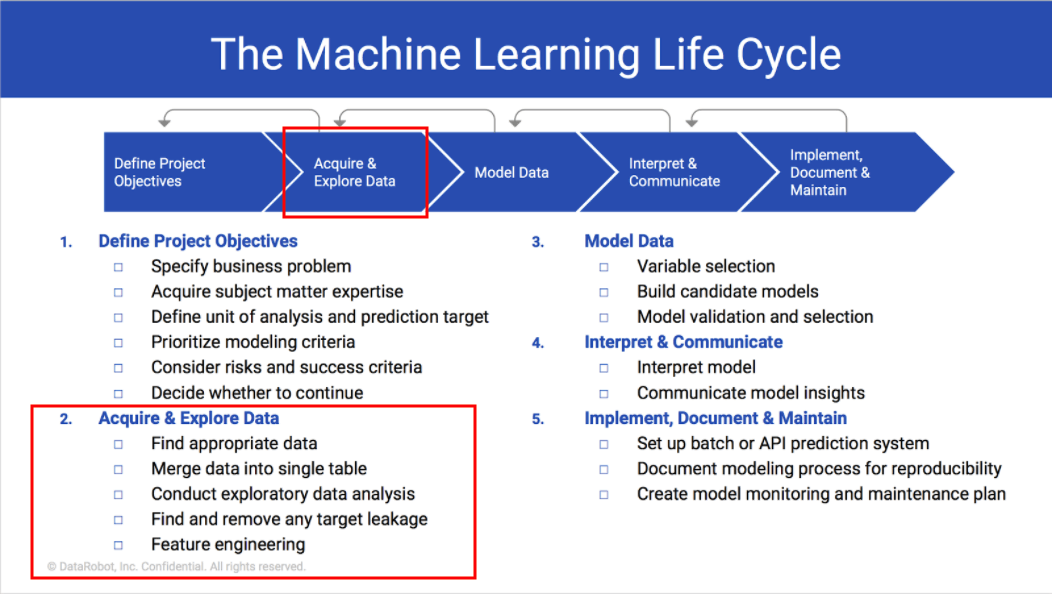